# 필요한 라이브러리 설치

In [1]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

# 데이터 불러오기

In [2]:
# 파일 받아오기
dataframes = []
for i in range(1,6):
    temp =  pd.read_csv(str(i)+"year_v3.csv")
    dataframes.append(temp)

# ID 제거

In [3]:
#ID 열은 제거
for i in range(5):
    dataframes[i] = dataframes[i].drop(['Unnamed: 0'],axis=1)

# 라벨 각각 입히기 ( Class 6개 )

In [4]:
for i in range(5):
    dataframes[i] = dataframes[i].replace({'bankruptcy':1},1+i)

# 라벨 각각 입히기 ( Class 3개 )

In [5]:
'''
df1 = df1.replace({'bankruptcy':1},1)


df2 = df2.replace({'bankruptcy':1},1)


df3 = df3.replace({'bankruptcy':1},2)


df4 = df4.replace({'bankruptcy':1},2)


df5 = df5.replace({'bankruptcy':1},0)
'''

"\ndf1 = df1.replace({'bankruptcy':1},1)\n\n\ndf2 = df2.replace({'bankruptcy':1},1)\n\n\ndf3 = df3.replace({'bankruptcy':1},2)\n\n\ndf4 = df4.replace({'bankruptcy':1},2)\n\n\ndf5 = df5.replace({'bankruptcy':1},0)\n"

# 중복 데이터 확인 및 제거

In [6]:
n = 1
my_str = ""
for i in range(5):
    if  dataframes[i].duplicated().sum()>0:
        my_str += str(n)+"번째 데이터셋 중복 데이터 Check!\n" 
        my_str += "중복된 데이터 수 : "+ str(dataframes[i].duplicated().sum()) +"\n"
        dataframes[i].drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
        my_str += "제거 후:"+ str(dataframes[i].duplicated().sum()) +"\n\n"
        n+=1

# Scaling

In [7]:
X = dataframes[0].drop(labels=['bankruptcy'], axis=1)
y = dataframes[0]['bankruptcy']
col_names = X.columns

In [8]:
def index_reset(df, data):
    data=data.reset_index()
    data=data.drop(labels=['index'], axis=1)
    Y = df['bankruptcy']
    Y= Y.reset_index()
    Y= Y.drop(labels=['index'], axis=1)
    data['bankruptcy']=Y
    return data

# 표준화만 하기!

In [9]:
'''
#스케일링 전처리 , feature 값과 Y값 분리 
X = df.drop(labels=['bankruptcy'], axis=1)
col_names = X.columns

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaled_standard = scaler_std.fit_transform(X)
standard_df = pd.DataFrame(scaled_standard, columns=col_names)

standard_df = index_reset(standard_df)
standard_df.head()
'''

"\n#스케일링 전처리 , feature 값과 Y값 분리 \nX = df.drop(labels=['bankruptcy'], axis=1)\ncol_names = X.columns\n\nfrom sklearn.preprocessing import StandardScaler\nscaler_std = StandardScaler()\nscaled_standard = scaler_std.fit_transform(X)\nstandard_df = pd.DataFrame(scaled_standard, columns=col_names)\n\nstandard_df = index_reset(standard_df)\nstandard_df.head()\n"

# 표준화만 한 거 쓸거면 이거 실행

In [10]:
#df = standard_df

# 정규화만 하기!

In [11]:
'''
#스케일링 전처리 , feature 값과 Y값 분리 
X = df.drop(labels=['bankruptcy'], axis=1)
col_names = X.columns

from sklearn.preprocessing import MinMaxScaler

scaler_nor = MinMaxScaler()
norm_array = scaler_nor.fit_transform(X)
normal_df = pd.DataFrame(norm_array, columns=col_names)

normal_df = index_reset(normal_df)
normal_df.head()
'''

"\n#스케일링 전처리 , feature 값과 Y값 분리 \nX = df.drop(labels=['bankruptcy'], axis=1)\ncol_names = X.columns\n\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler_nor = MinMaxScaler()\nnorm_array = scaler_nor.fit_transform(X)\nnormal_df = pd.DataFrame(norm_array, columns=col_names)\n\nnormal_df = index_reset(normal_df)\nnormal_df.head()\n"

# 정규화만 한 거 쓸거면 이거 실행

In [12]:
#df = normal_df

# 표준화, 정규화 둘 다 하기!

In [13]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler_nor = MinMaxScaler()

for i in range(5):
    # Feature만 추출.
    X = dataframes[i].drop(labels=['bankruptcy'], axis=1)
    
    #표준화
    df_standard = scaler_std.fit_transform(X)
    
    #정규화
    norm_array = scaler_nor.fit_transform(df_standard)
    
    #Scaling 후 배열로 변한 데이터 셋을 dataFrame으로 만들어줌.
    temp_df = pd.DataFrame(norm_array, columns=col_names)
    
    # Y와 합치면서 index reset
    dataframes[i] = index_reset(dataframes[i],temp_df)

In [14]:
df_columns = dataframes[0].columns

# 표준화, 정규화 둘 다 한거 쓸거면 이거 실행

In [15]:
#df = SN_df

# 결측치 확인

<AxesSubplot:>

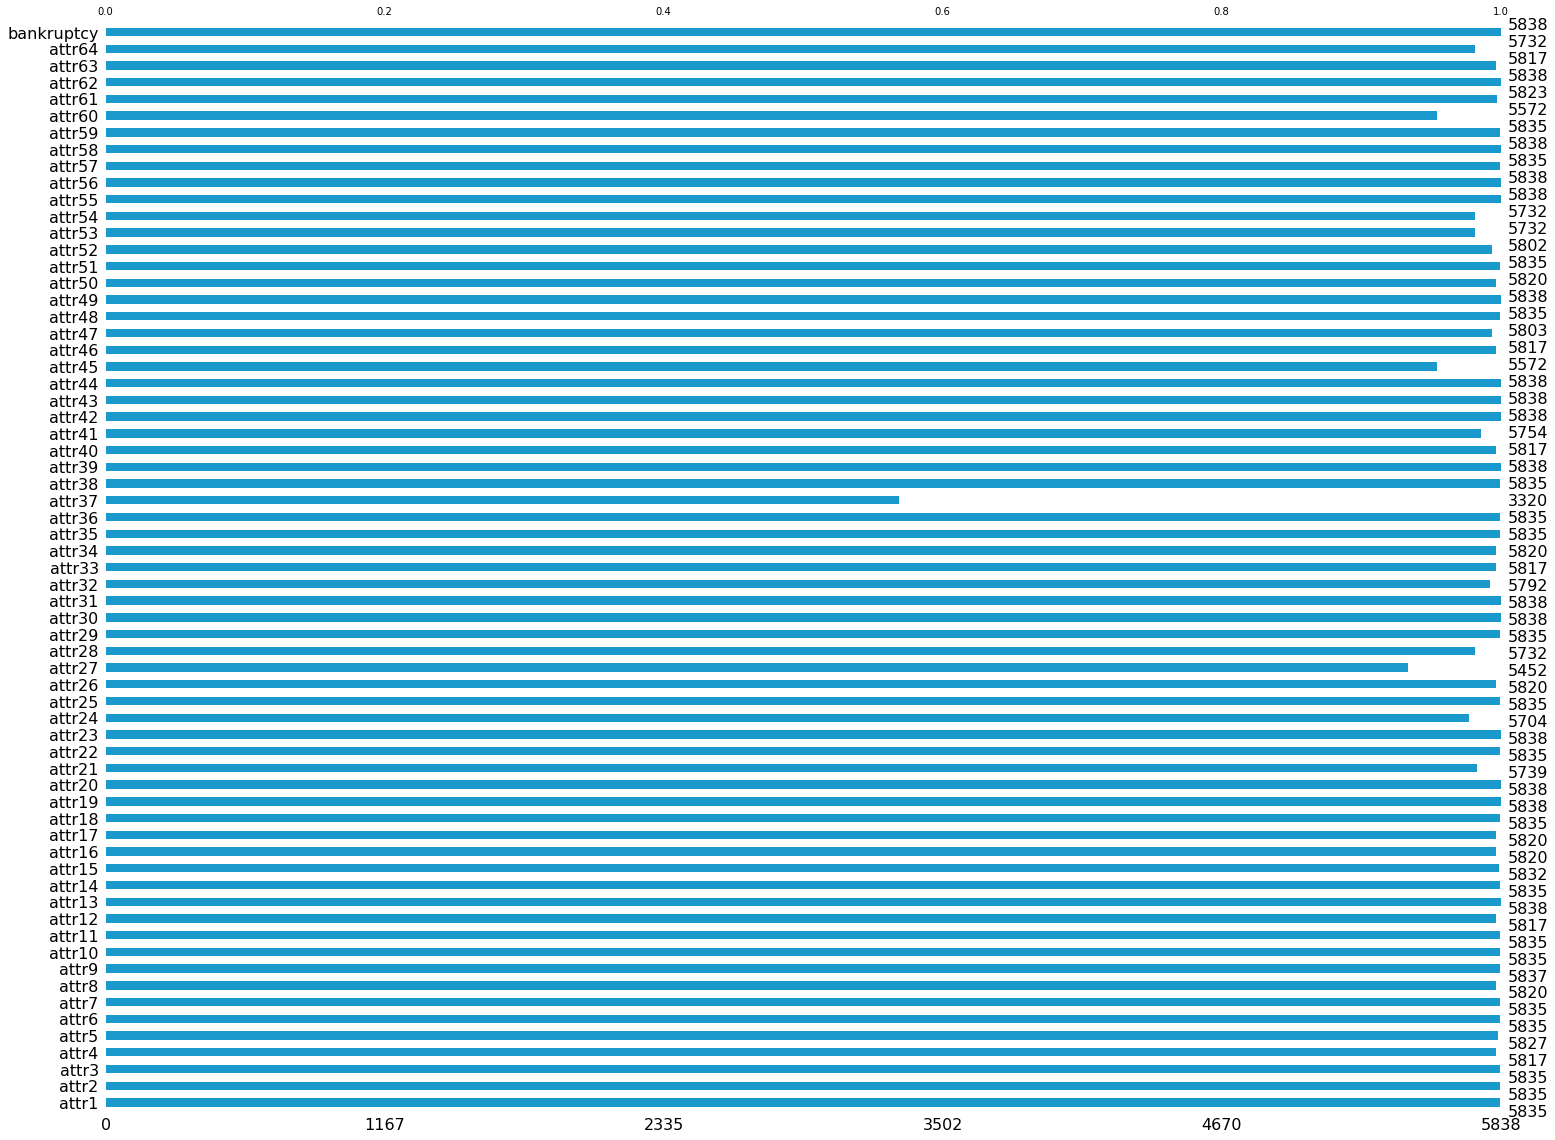

In [16]:
# 결측치 확인

msno.bar(df=dataframes[i].iloc[:, :], color=(0.1, 0.6, 0.8))

# 1. Iterative 결측치 대체 방법

In [17]:
MICE_dataframe=[]
# Iterative Imputer를 이용한 다중대치
for i in range(5):
    dummy = pd.get_dummies(dataframes[i])
    temp = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(dummy),columns = df_columns)
    MICE_dataframe.append(temp)

# 2. 단순 대치법( 열과 행 )

In [18]:
simple_imputer =[]
# 상위 5개 지워
for i in range(0,5):
    temp = dataframes[i].drop(['attr37', 'attr27', 'attr60', 'attr45', 'attr21'], axis=1)
    # 결측치 존재하는 rows에 대해서는 단순 대치
    temp = temp.dropna(axis=0)
    simple_imputer.append(temp)

# 3. KNN 결측치 대체 방법

In [19]:
KNN_dataframes=[]
imputer=KNNImputer(n_neighbors=5)
for i in range(5):
    temp = imputer.fit_transform(dataframes[i])
    temp = pd.DataFrame(temp, columns = df_columns)
    KNN_dataframes.append(temp)

# 결측치 대체 후 결측치 확인

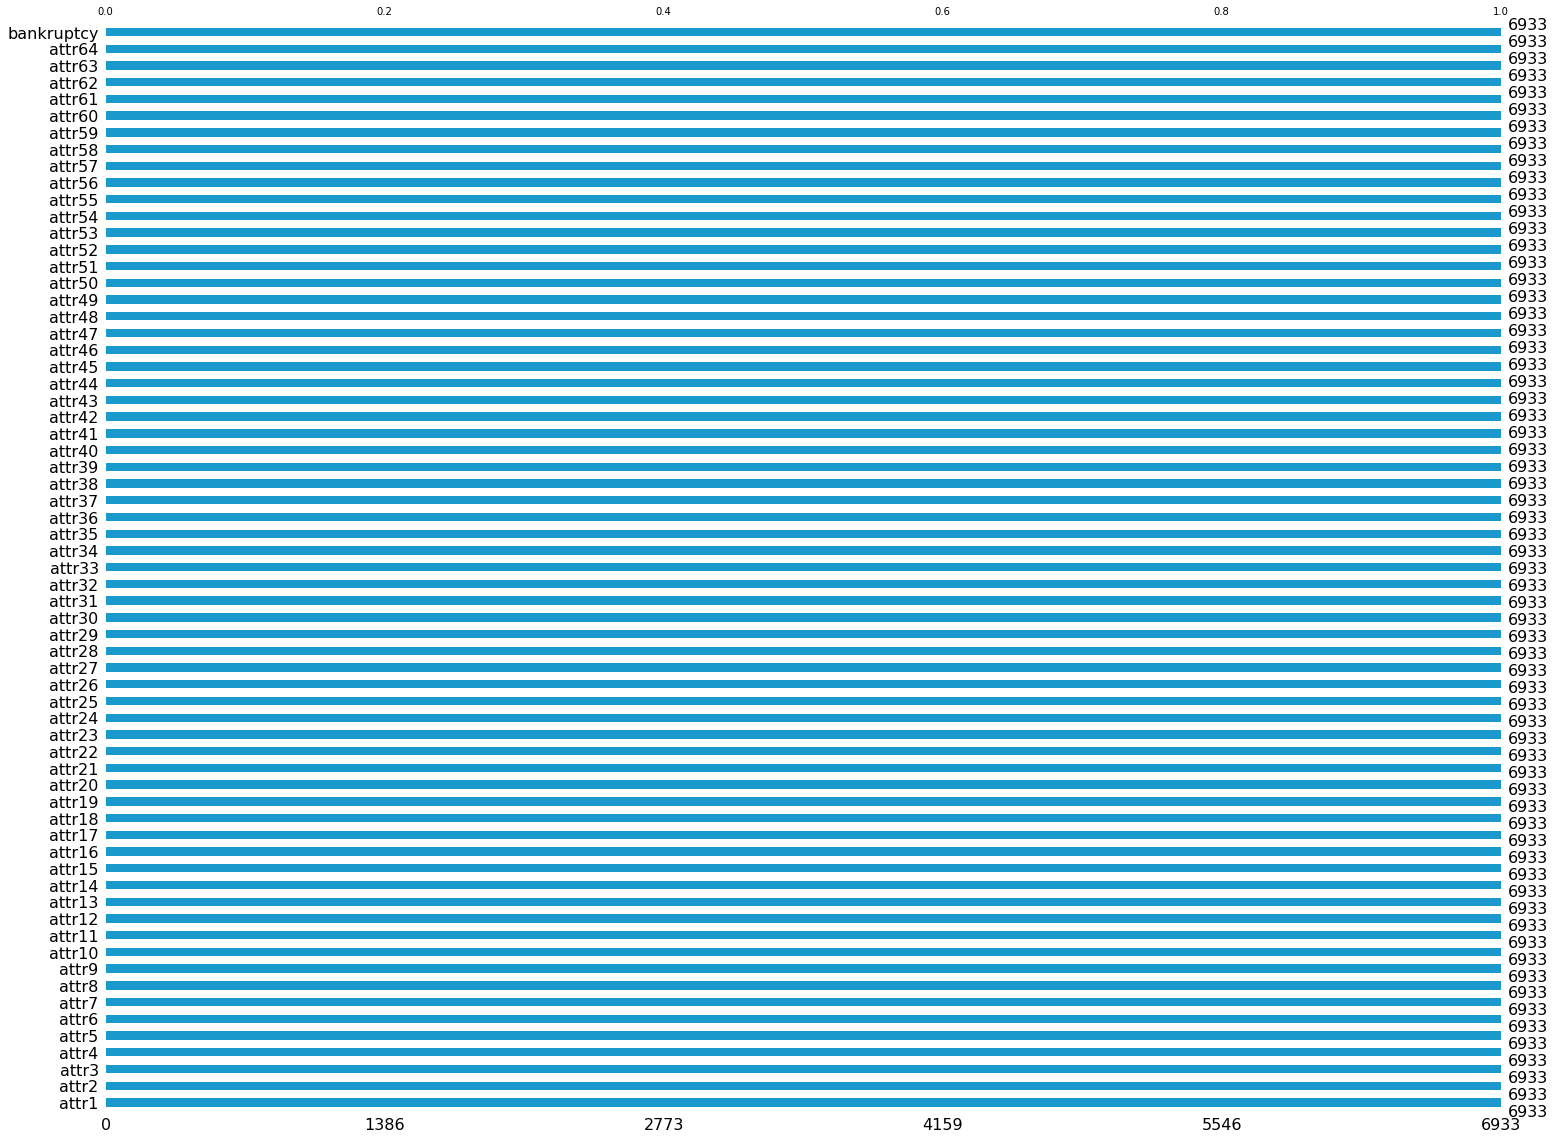

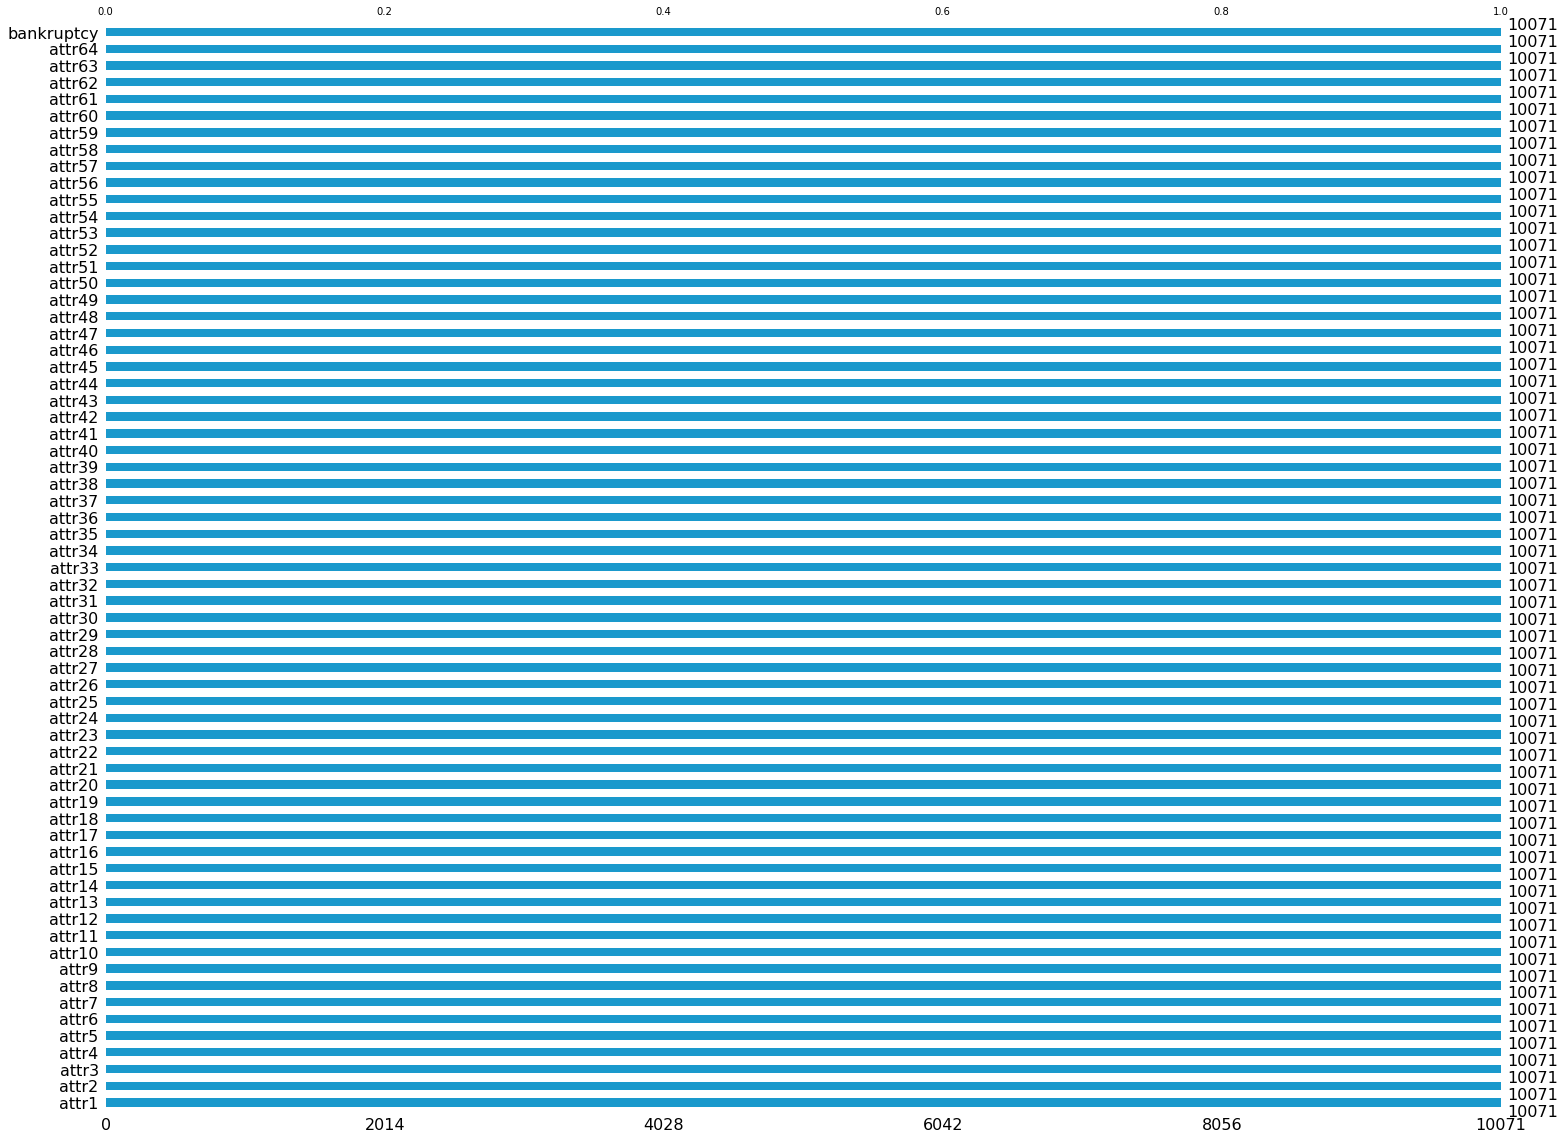

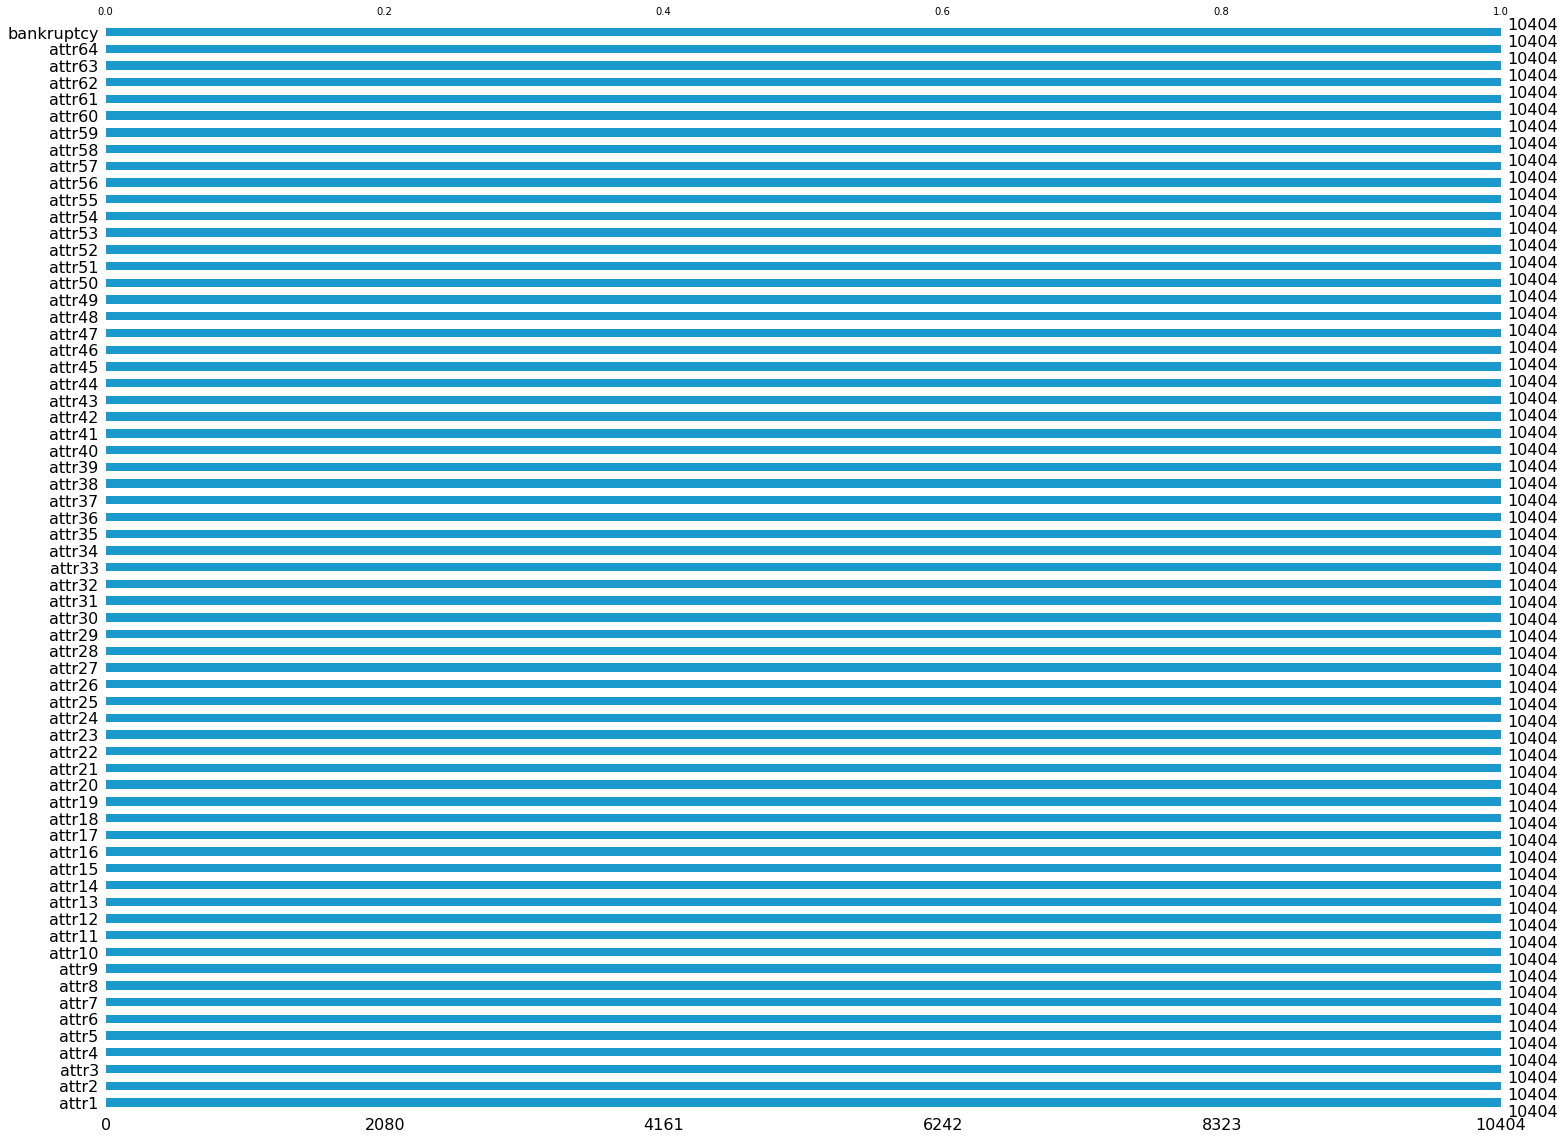

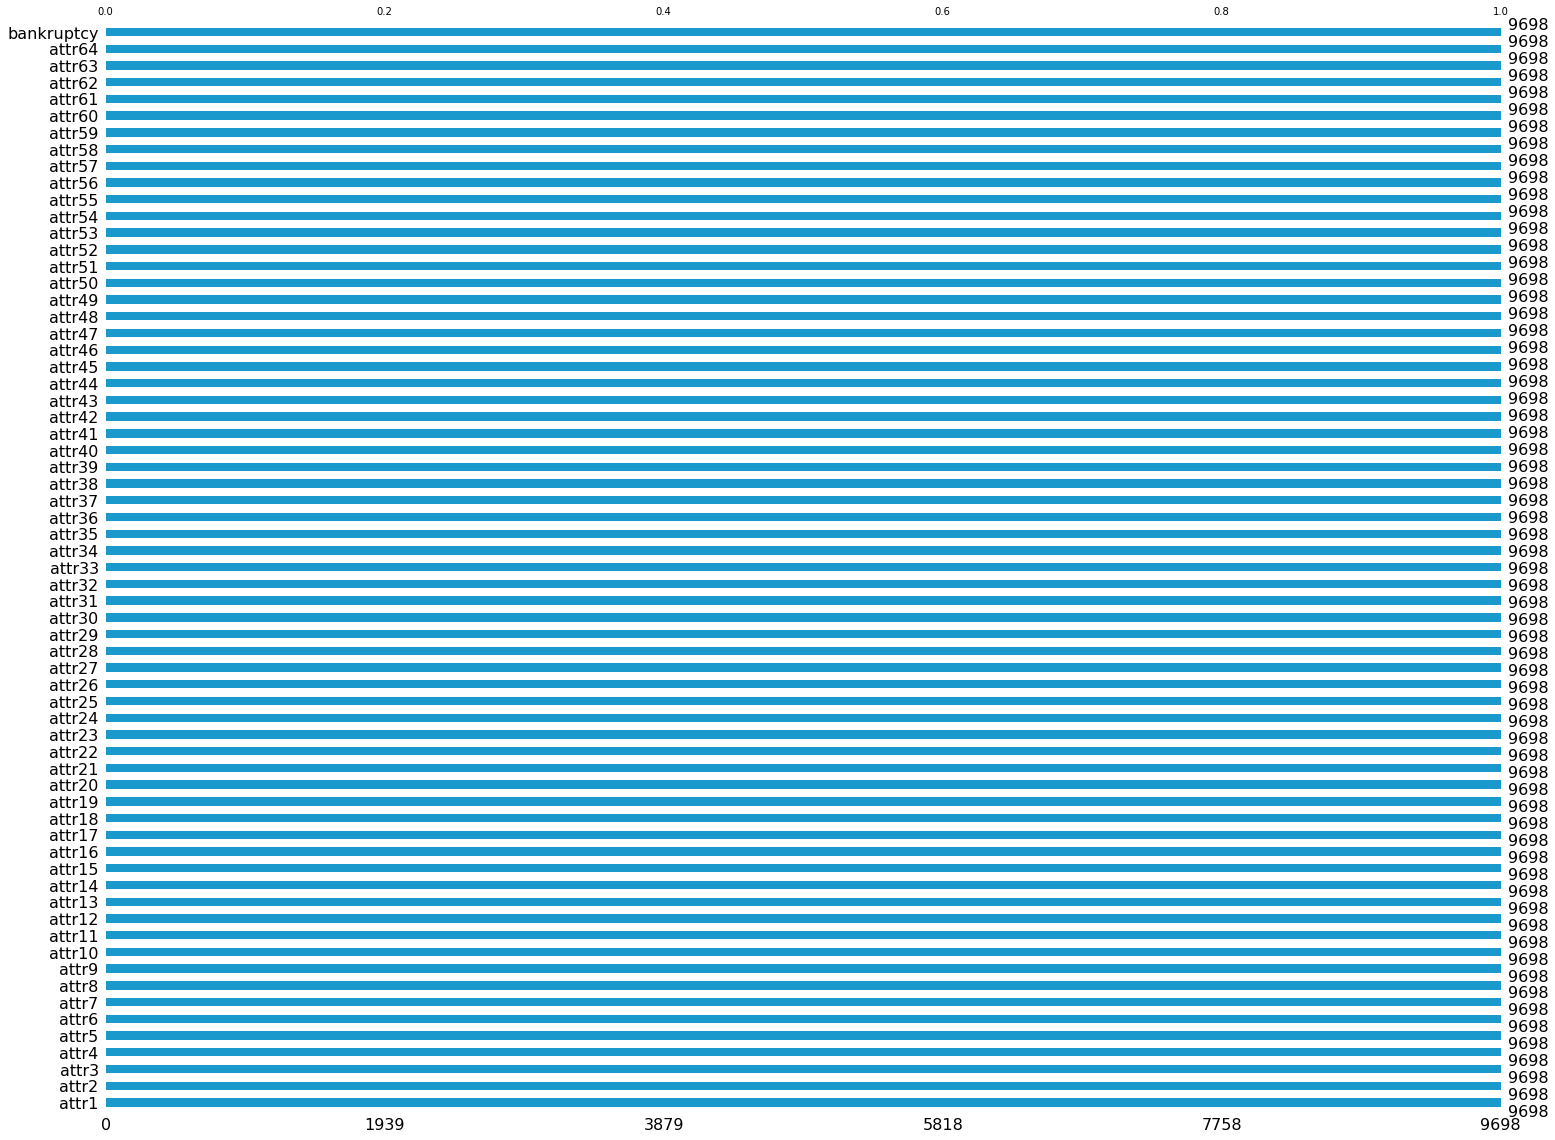

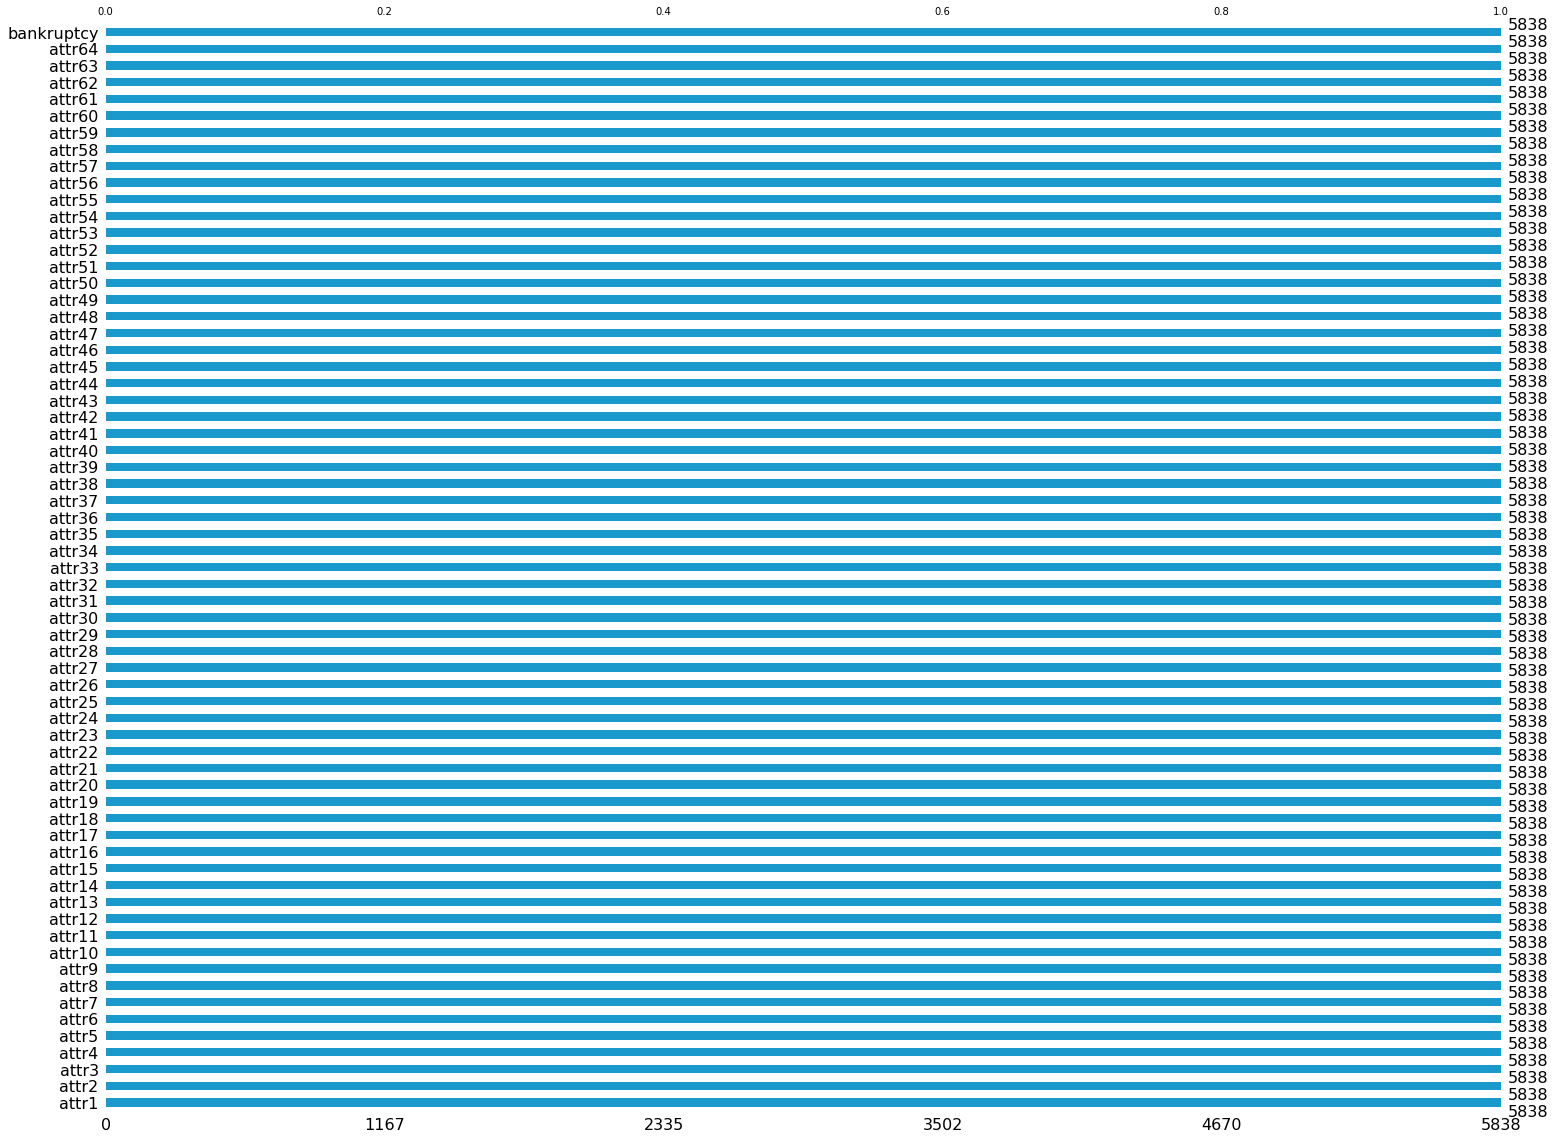

In [21]:
for i in range(5):
    msno.bar(df=MICE_dataframe[i].iloc[:, :], color=(0.1, 0.6, 0.8))
    plt.show()

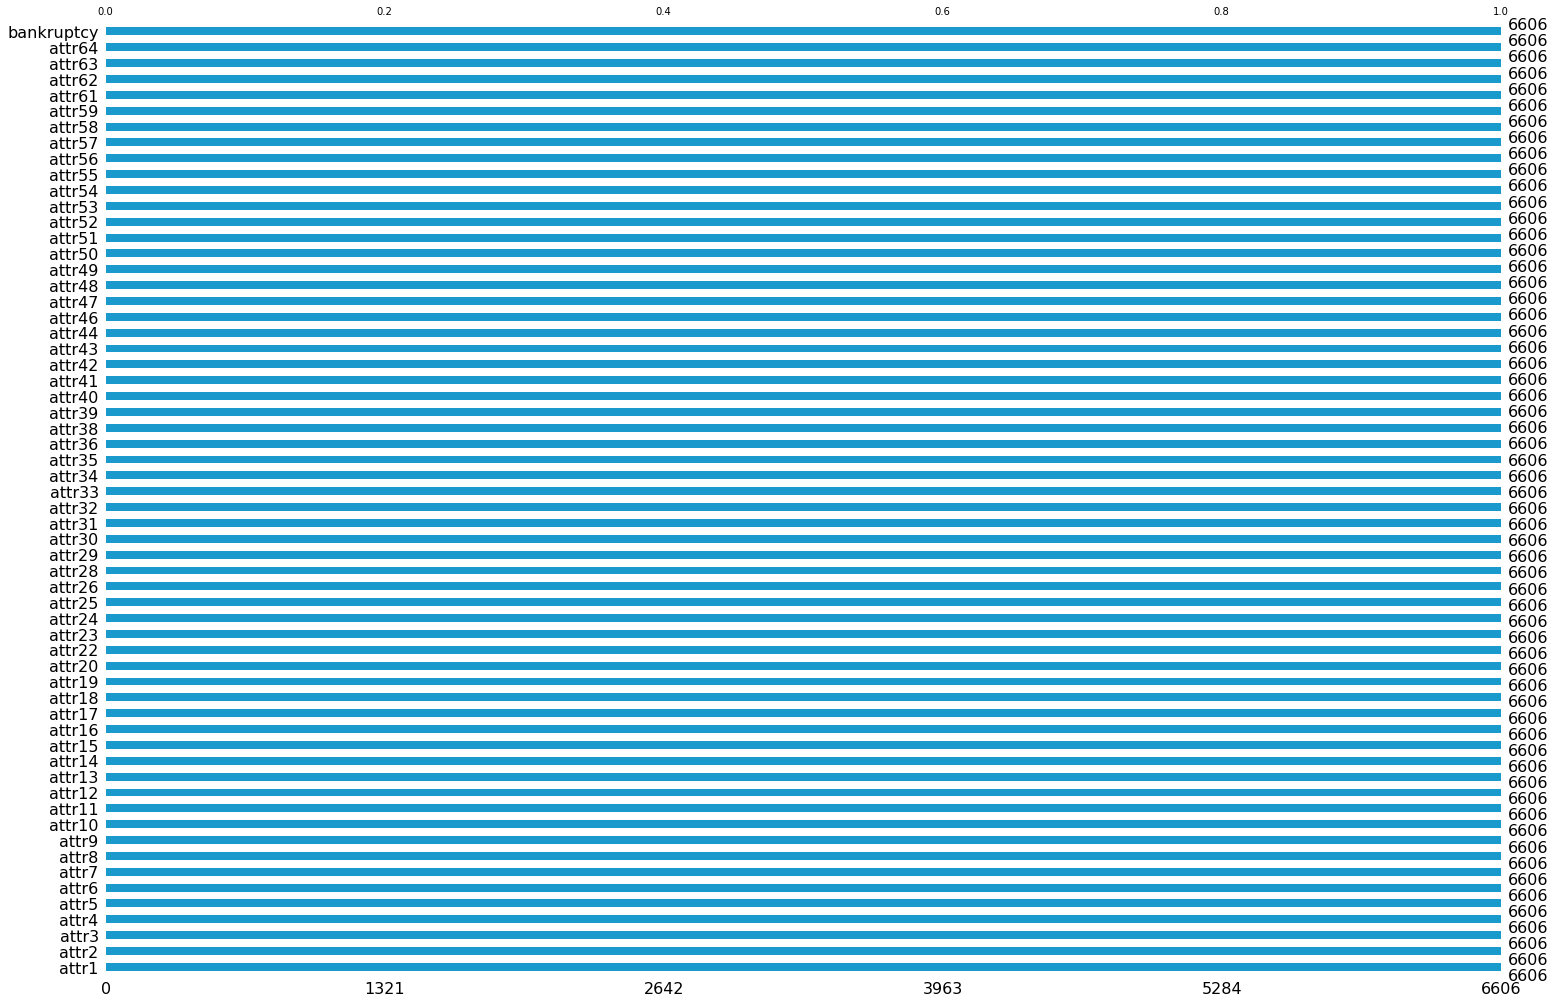

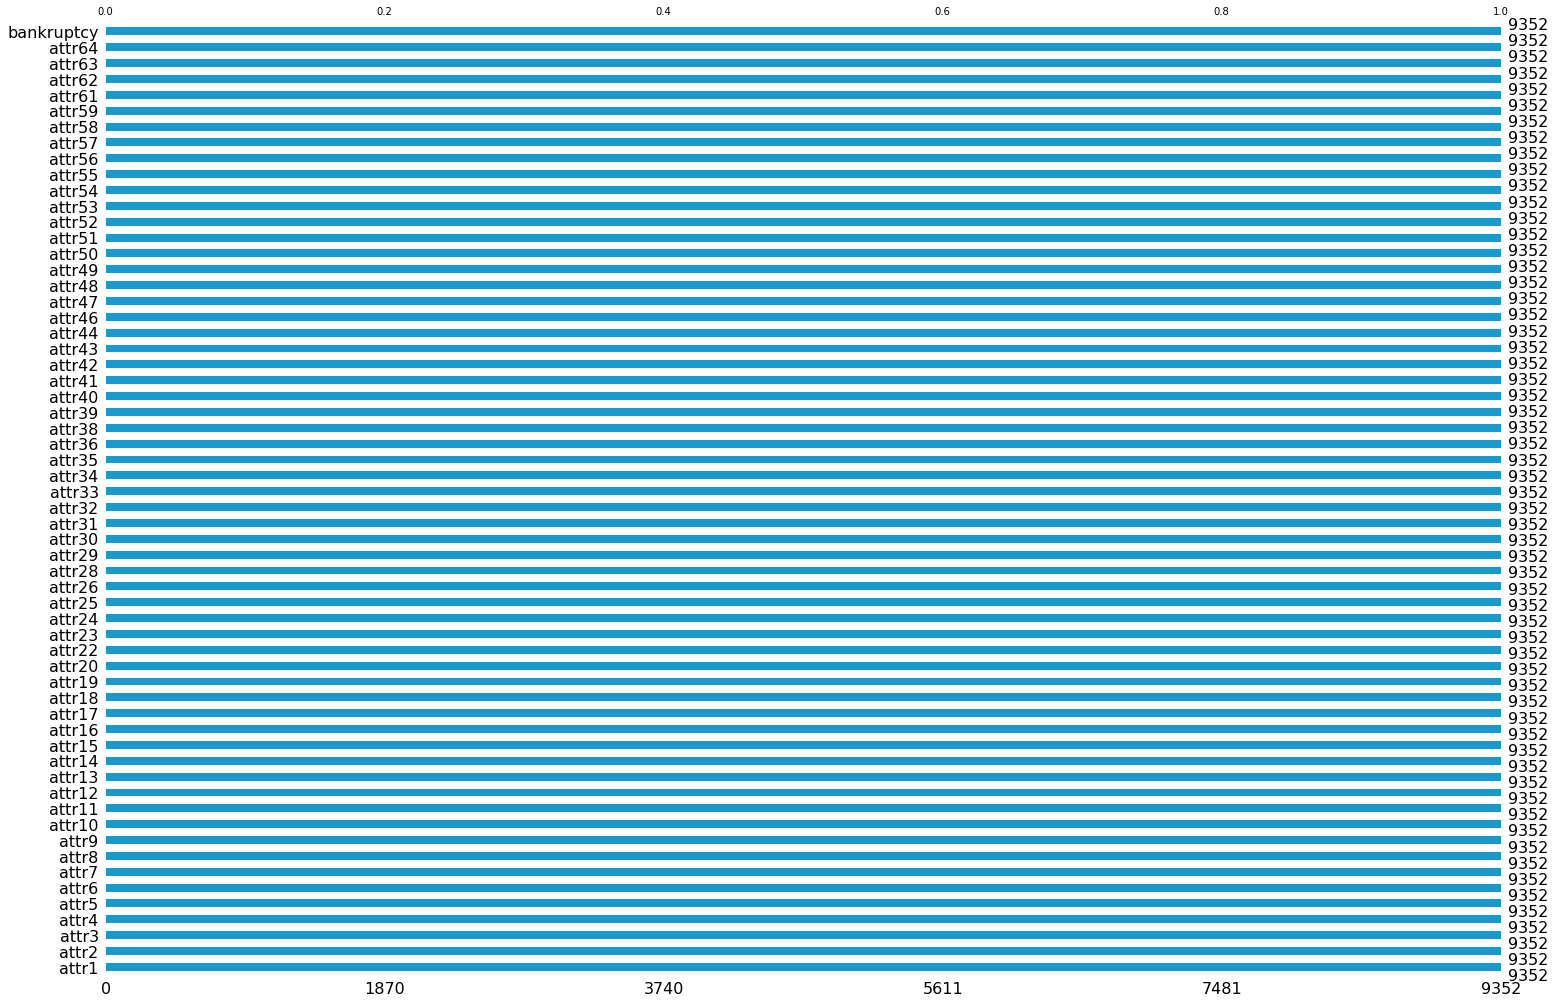

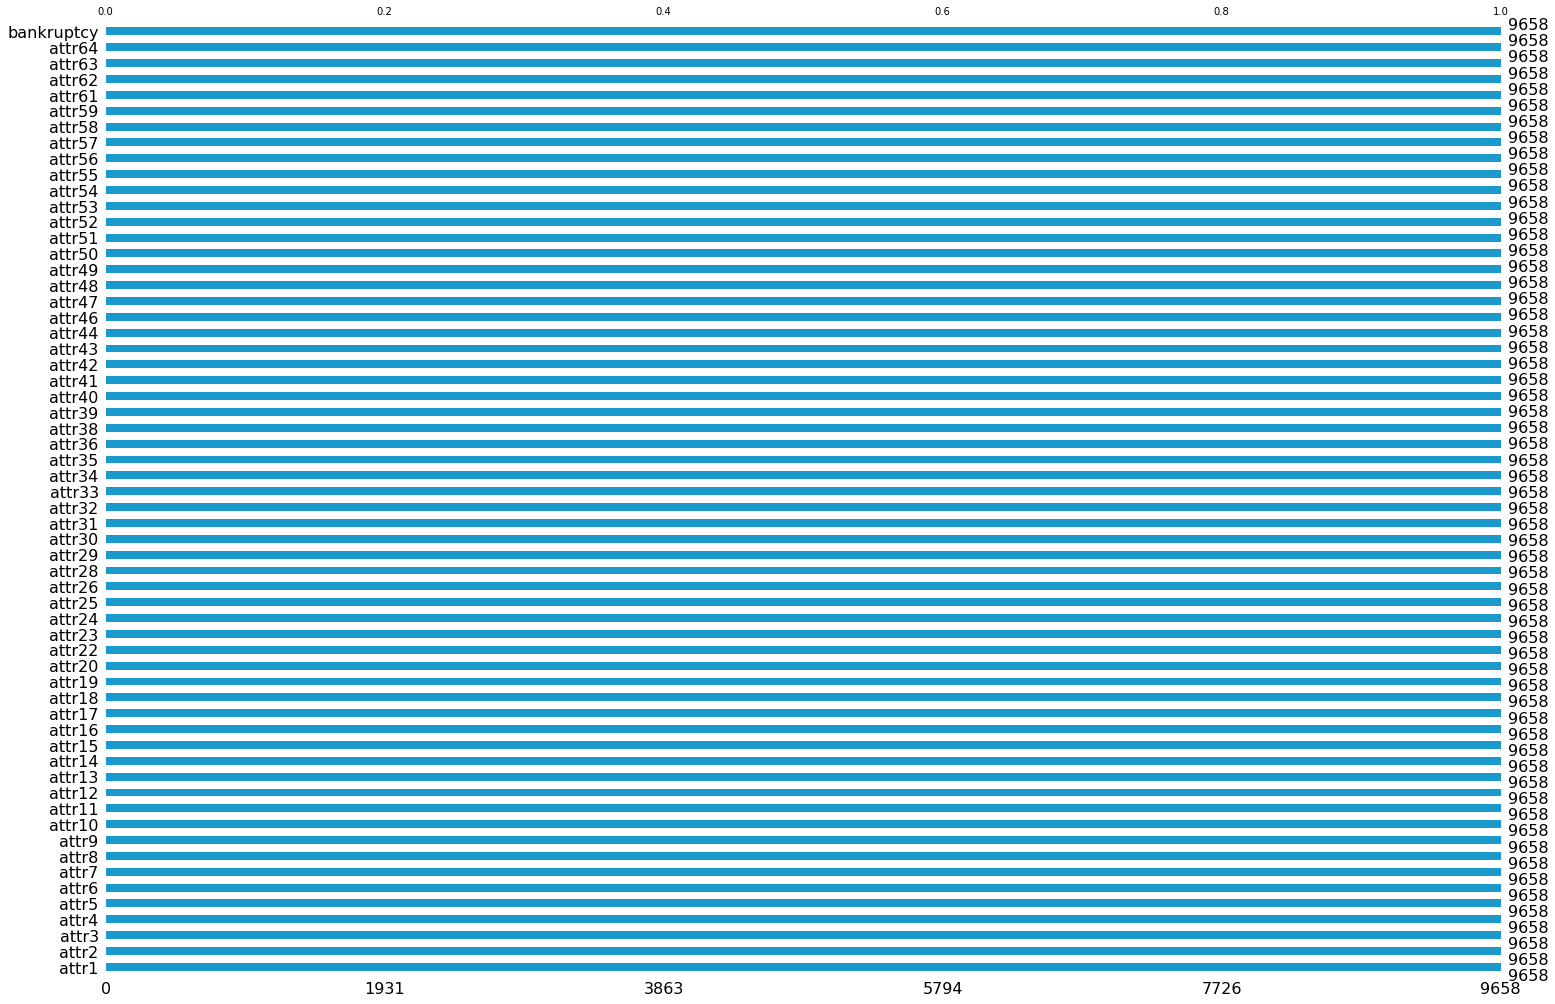

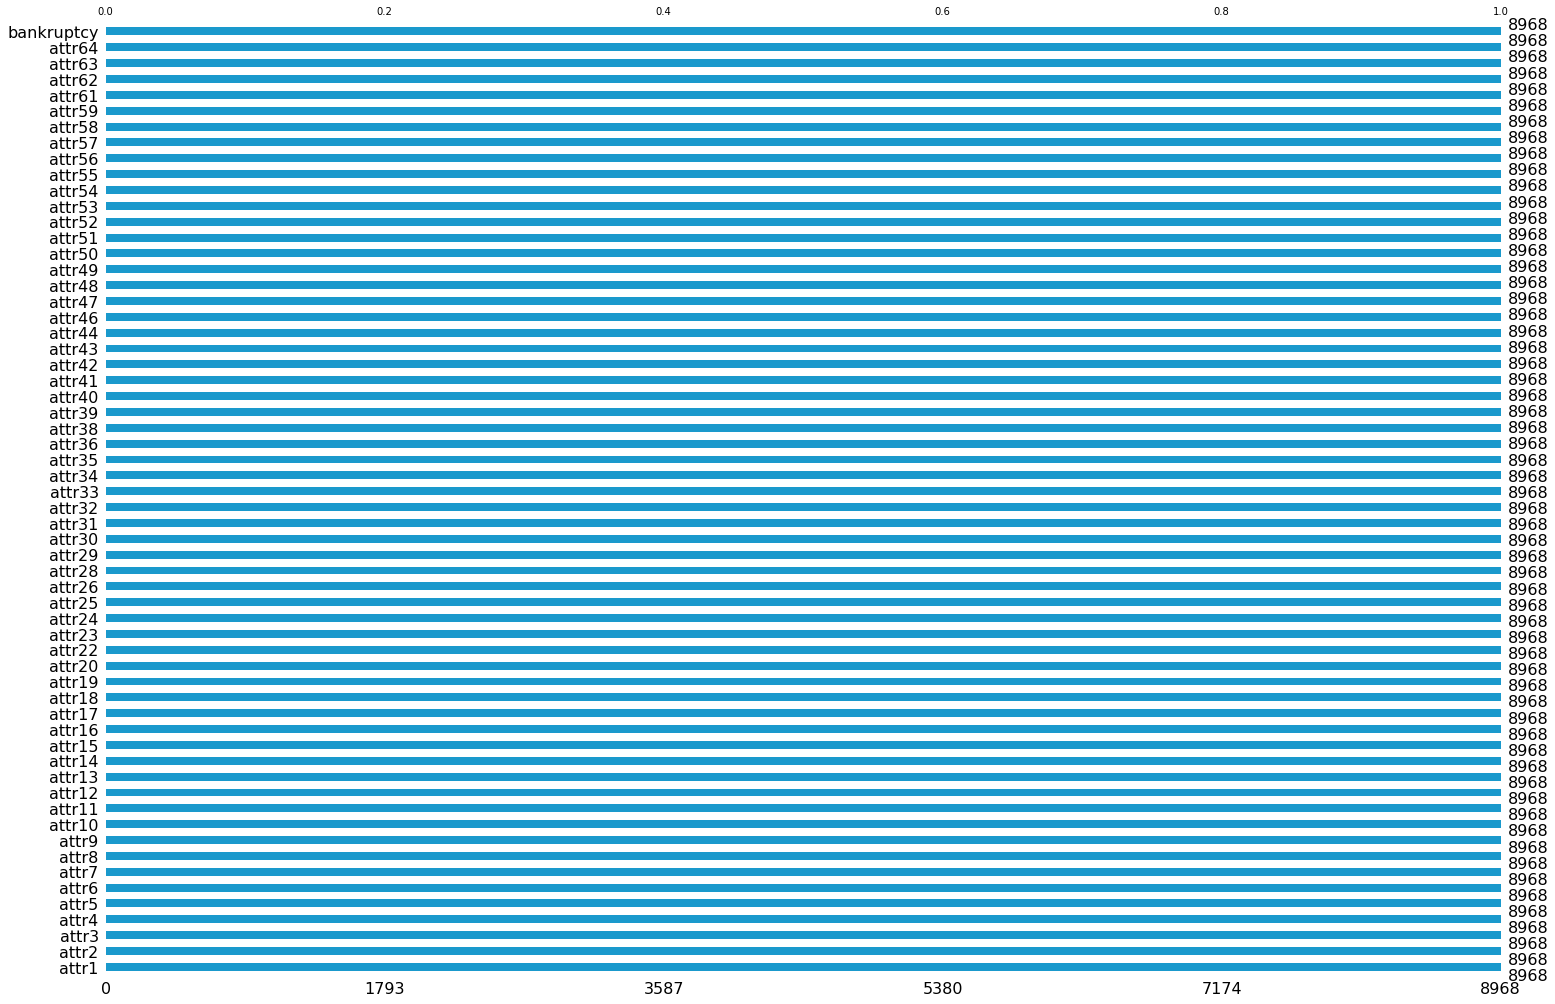

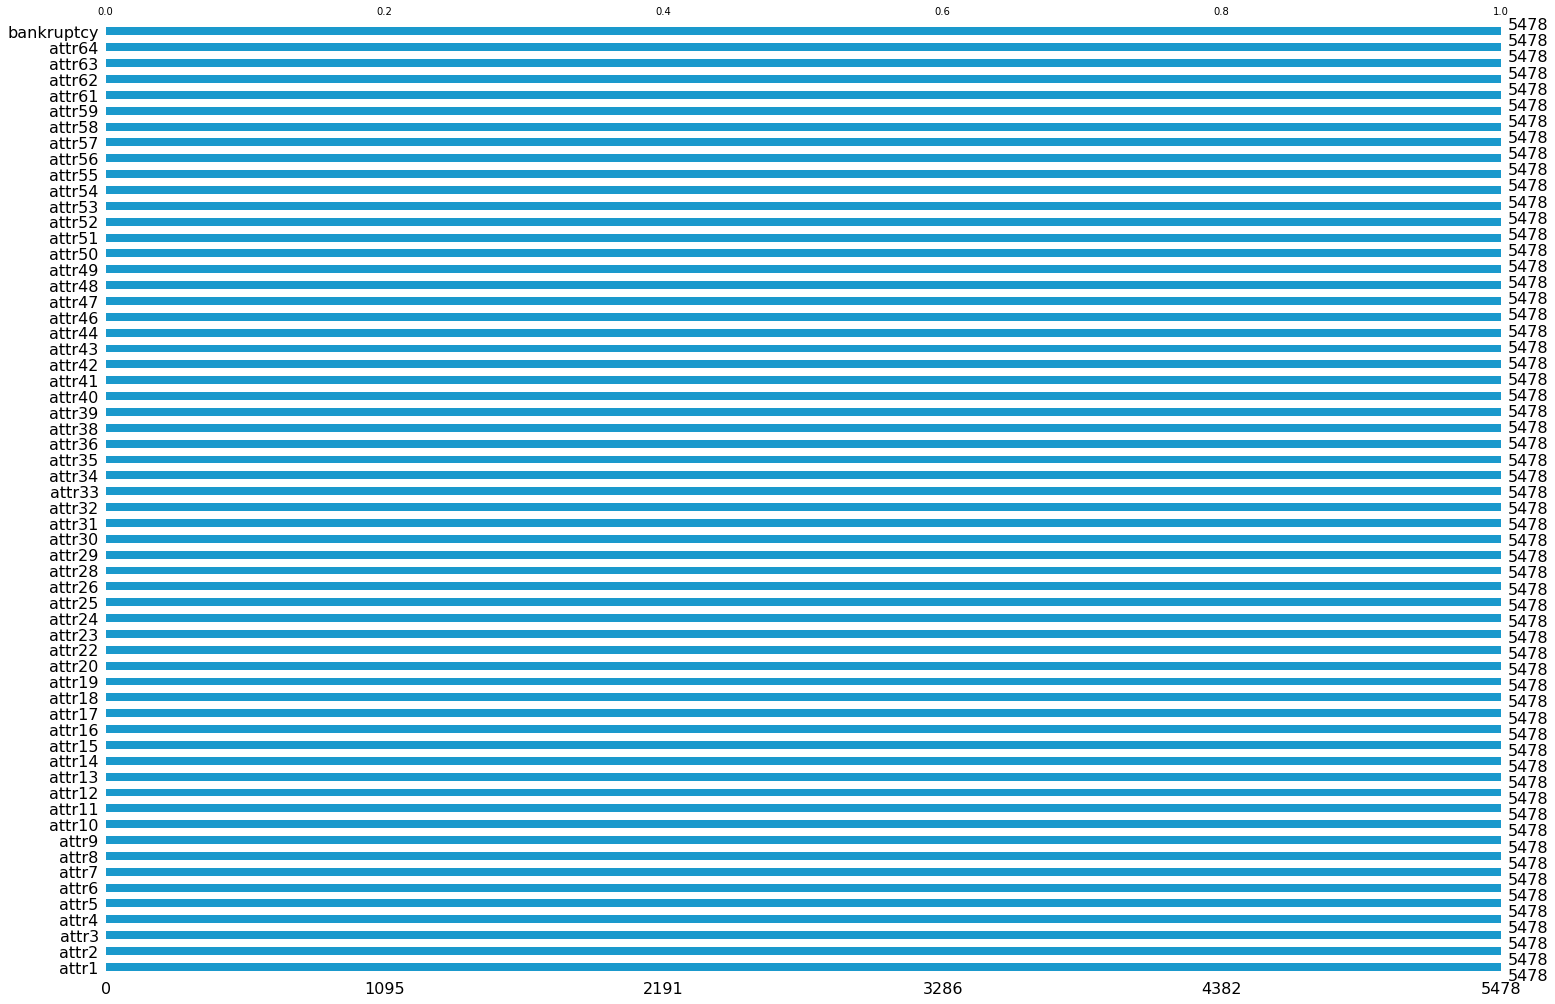

In [22]:
for i in range(5):
    msno.bar(df=simple_imputer[i].iloc[:, :], color=(0.1, 0.6, 0.8))
    plt.show()

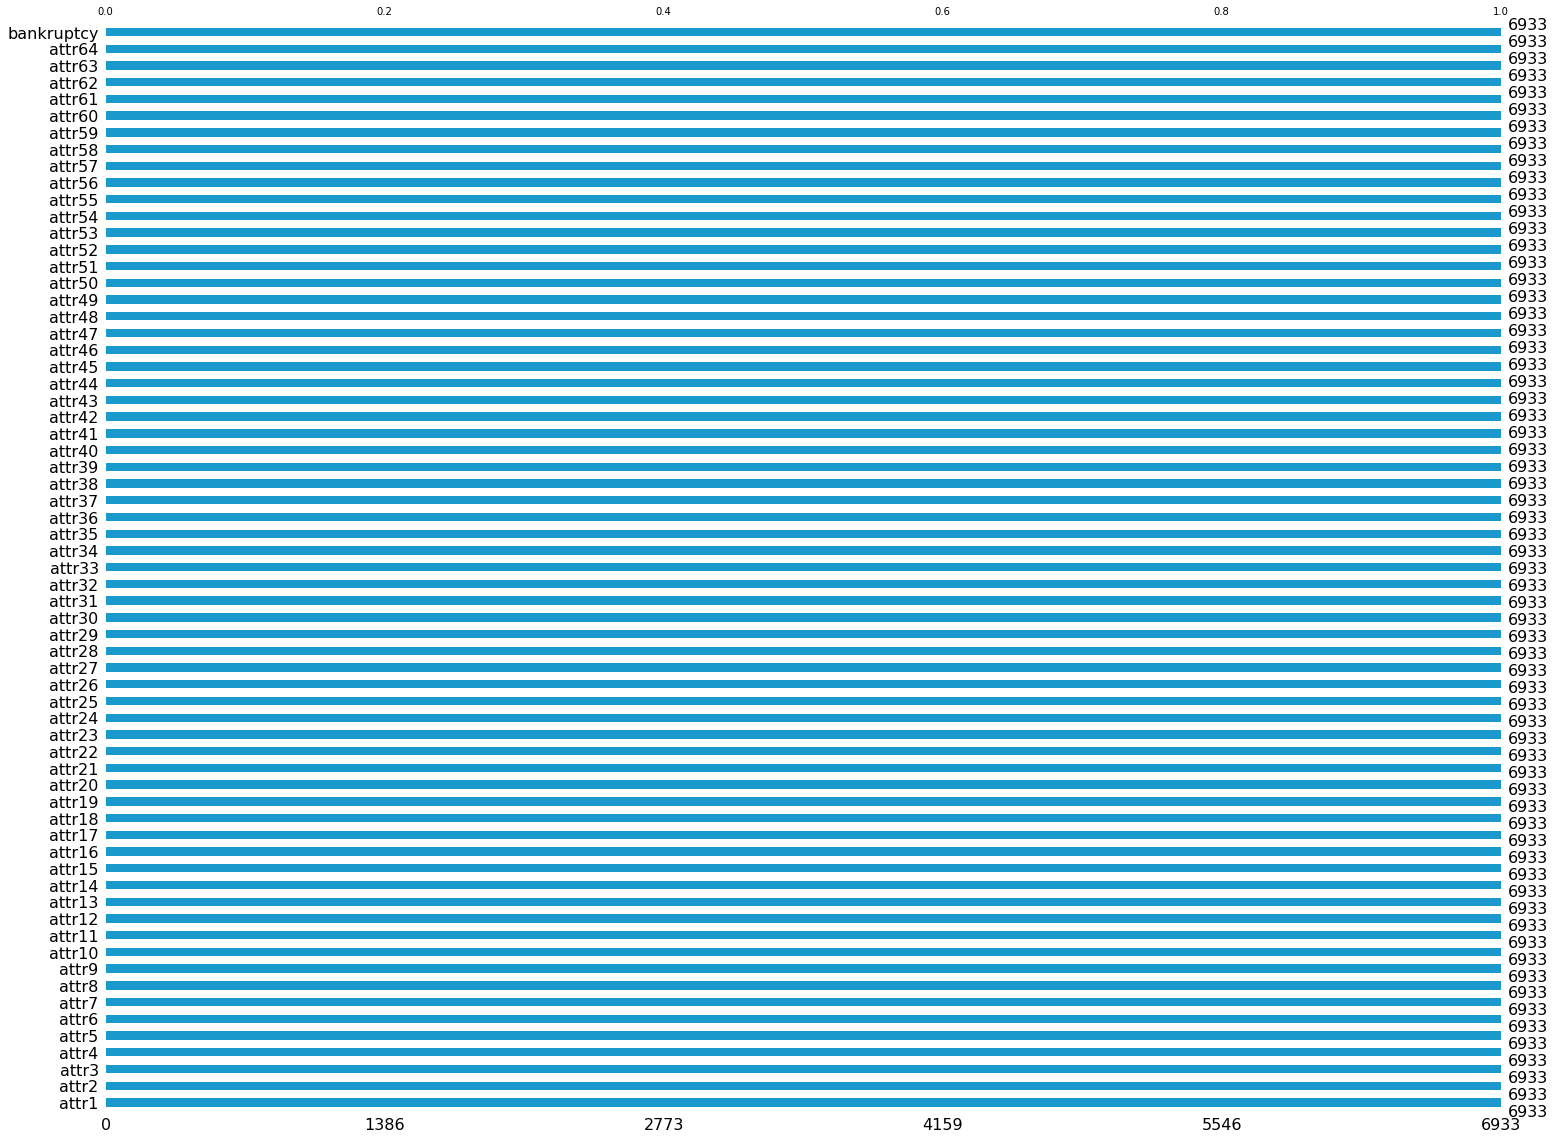

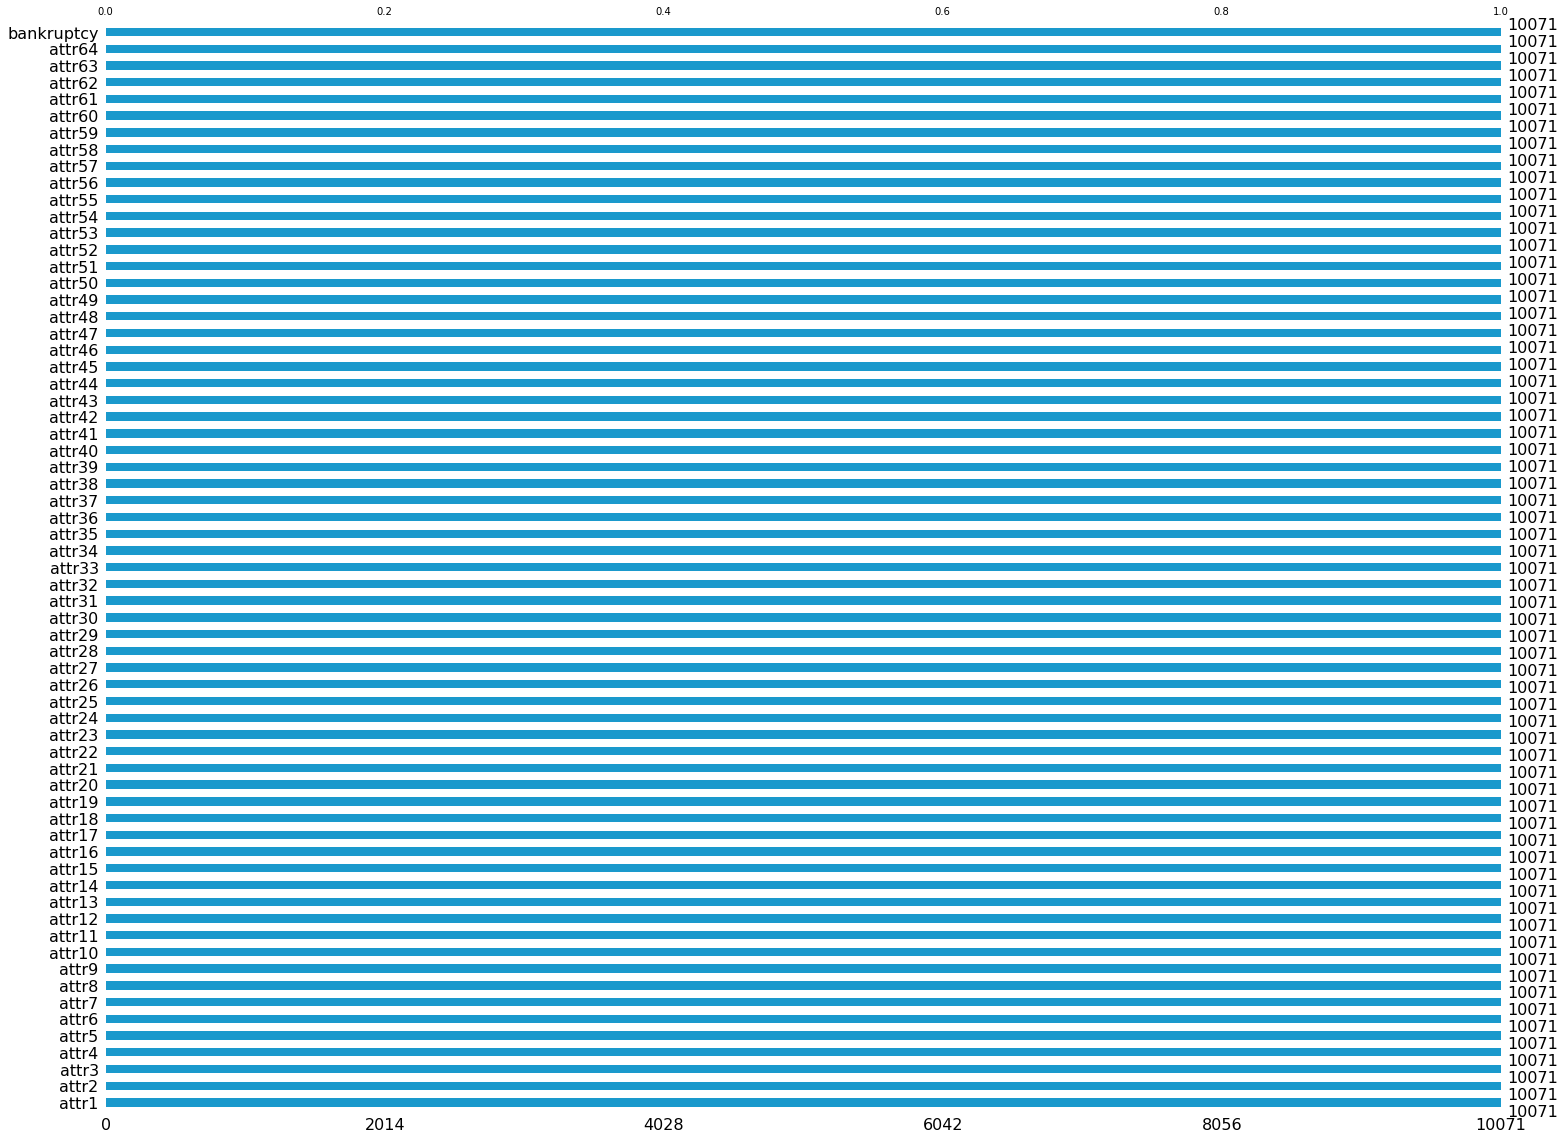

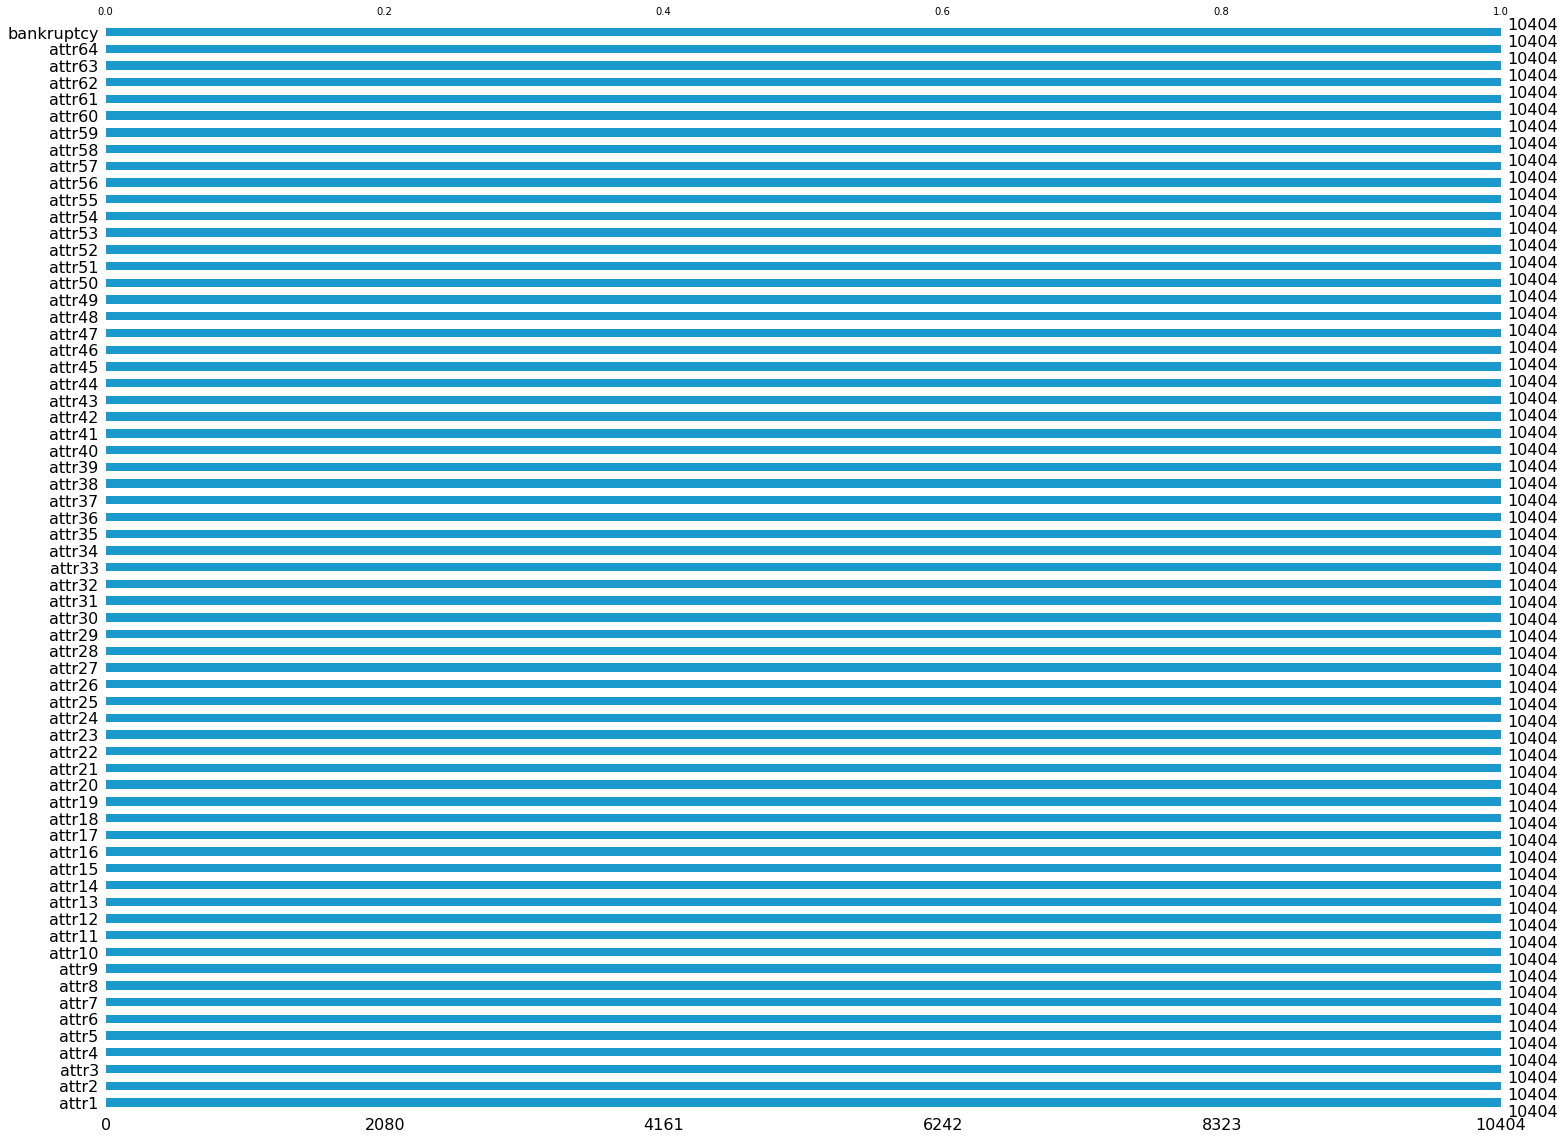

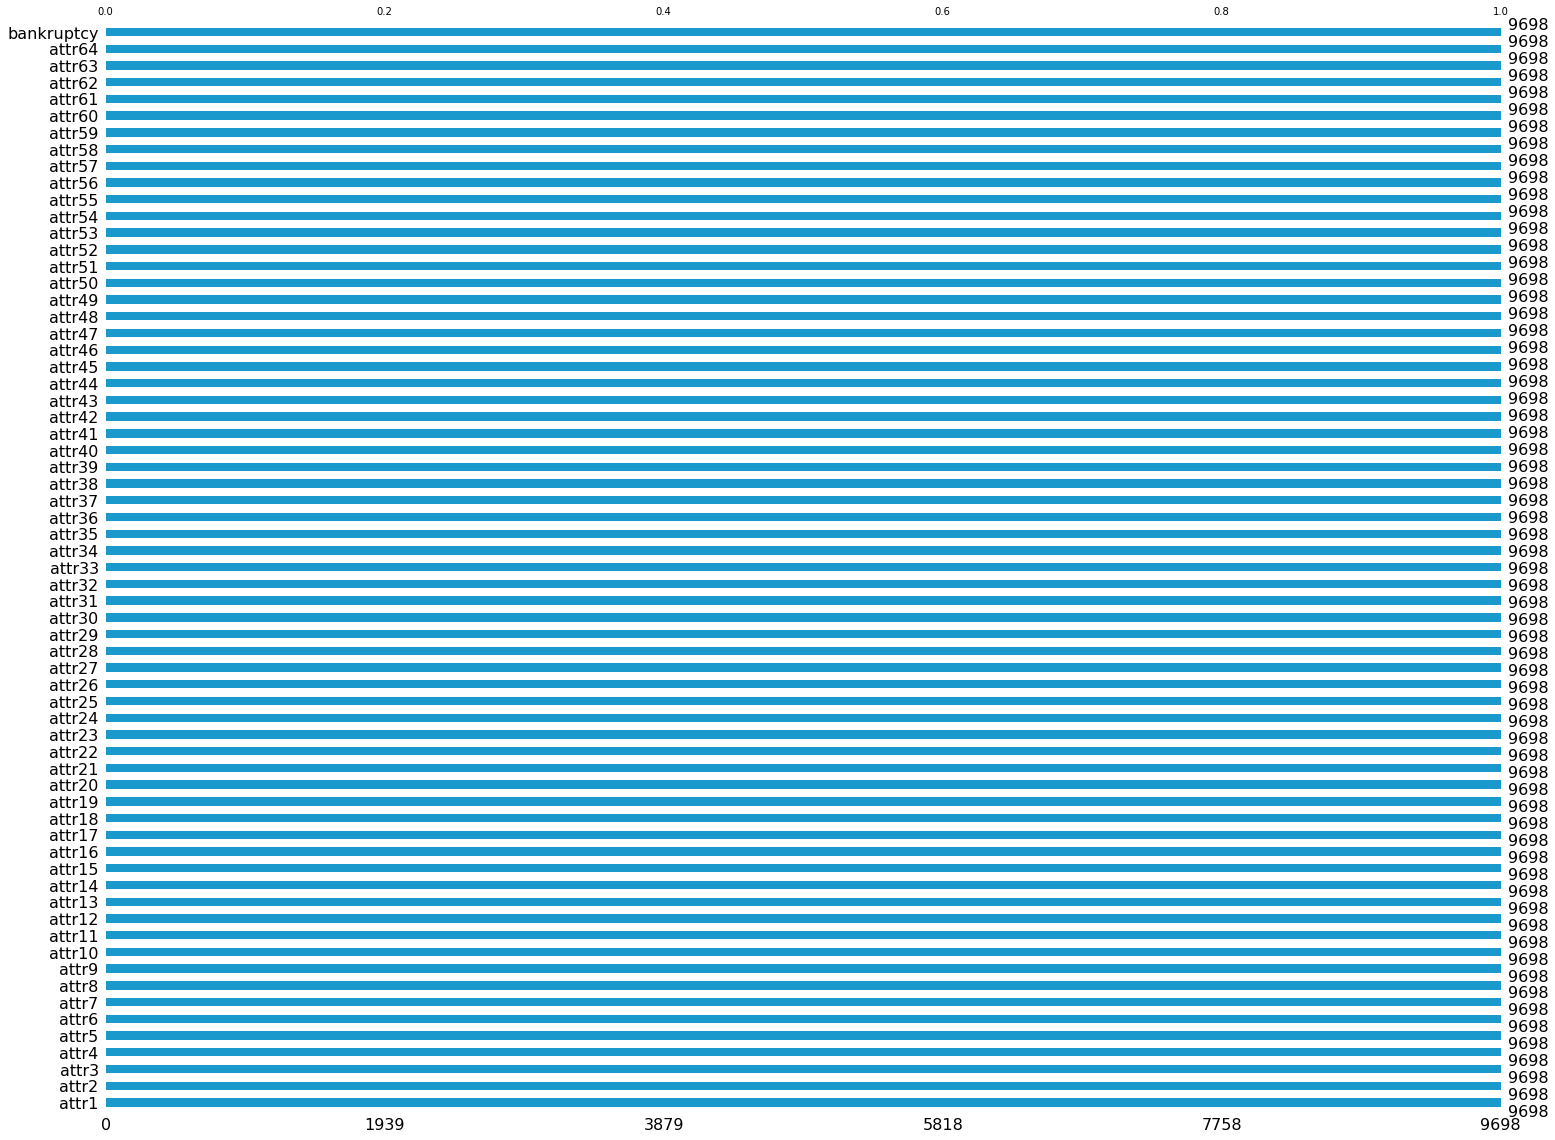

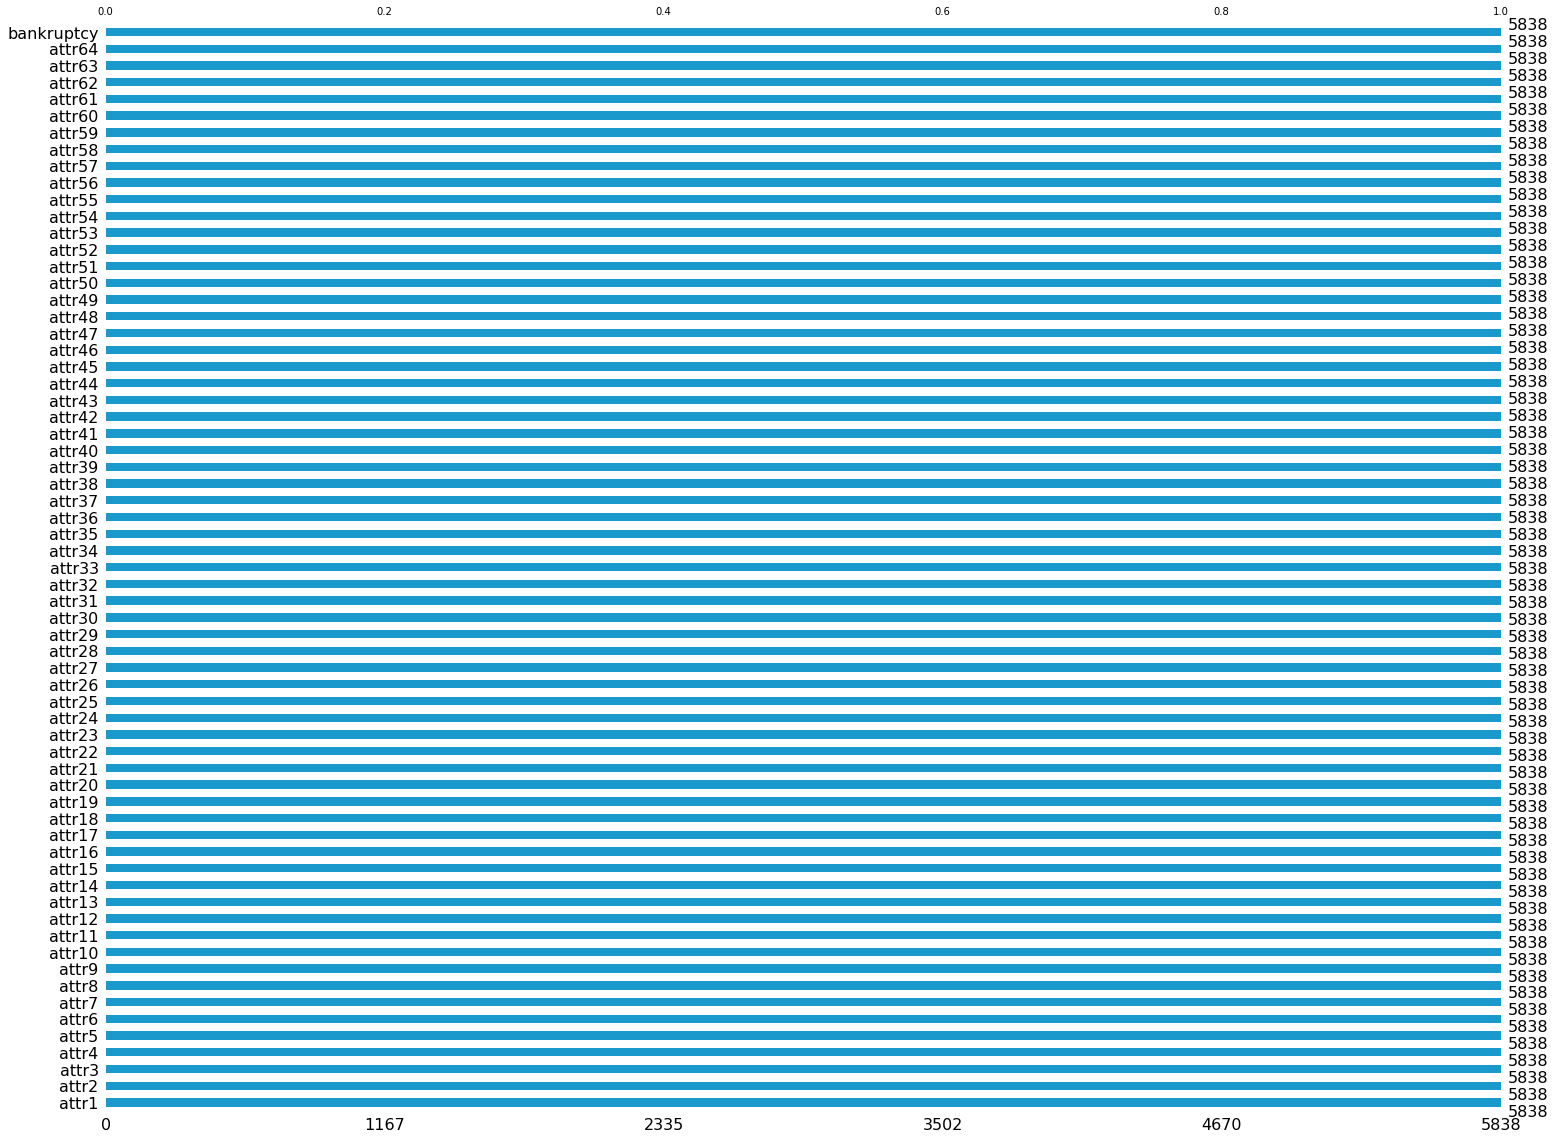

In [23]:
for i in range(5):
    msno.bar(df=KNN_dataframes[i].iloc[:, :], color=(0.1, 0.6, 0.8))
    plt.show()

# 데이터셋 합치기

In [24]:
def comb_dataframes(dataframes):
    #for i in range(5):
    #    dataframes[i] = dataframes[i].replace({'bankruptcy':1},1+i)
    df = pd.concat([dataframes[0], dataframes[1], dataframes[2], dataframes[3], dataframes[4]])
    return df

# 각 데이터셋 만들기

In [25]:
imputed_dataframes= OrderedDict()
imputed_dataframes['simple'] = comb_dataframes(simple_imputer)
imputed_dataframes['KNN'] = comb_dataframes(KNN_dataframes)
imputed_dataframes['MICE'] = comb_dataframes(MICE_dataframe)

In [26]:
MICE_df=imputed_dataframes["MICE"]
KNN_df=imputed_dataframes["KNN"]
simple_df=imputed_dataframes["simple"]

In [27]:
MICE_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025,0.0
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207,0.0
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018,0.0
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019,0.0
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027,0.0


In [28]:
KNN_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025,0.0
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207,0.0
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018,0.0
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019,0.0
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027,0.0


In [29]:
simple_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64,bankruptcy
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000243,0.000003,0.004237,0.000025,0
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000171,0.000003,0.004052,0.000019,0
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000204,0.000005,0.002753,0.000027,0
8,0.731552,0.141716,0.997857,0.001107,0.733117,0.567150,0.294677,0.089101,0.000344,0.286301,...,0.153970,0.999999,0.713498,7.631905e-07,0.733574,0.000201,0.000005,0.003006,0.000009,0
11,0.731449,0.140702,0.998007,0.002039,0.733118,0.567029,0.294617,0.093551,0.000234,0.286618,...,0.154233,0.999999,0.713371,9.981900e-07,0.732812,0.000638,0.000003,0.004564,0.000002,0


# x, y 나누기

In [30]:
Mx = MICE_df.drop(labels=['bankruptcy'], axis=1)
My = MICE_df['bankruptcy'].to_frame()

In [31]:
Mx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.154413,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.155188,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027


In [32]:
Kx = KNN_df.drop(labels=['bankruptcy'], axis=1)
Ky = KNN_df['bankruptcy'].to_frame()

In [33]:
Kx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.154413,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.155188,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027


In [34]:
Sx = simple_df.drop(labels=['bankruptcy'], axis=1)
Sy = simple_df['bankruptcy'].to_frame()

In [35]:
Sx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr54,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.000688,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000243,0.000003,0.004237,0.000025
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.000689,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.000688,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000204,0.000005,0.002753,0.000027
8,0.731552,0.141716,0.997857,0.001107,0.733117,0.567150,0.294677,0.089101,0.000344,0.286301,...,0.000681,0.153970,0.999999,0.713498,7.631905e-07,0.733574,0.000201,0.000005,0.003006,0.000009
11,0.731449,0.140702,0.998007,0.002039,0.733118,0.567029,0.294617,0.093551,0.000234,0.286618,...,0.000682,0.154233,0.999999,0.713371,9.981900e-07,0.732812,0.000638,0.000003,0.004564,0.000002


# Oversampling 진행

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

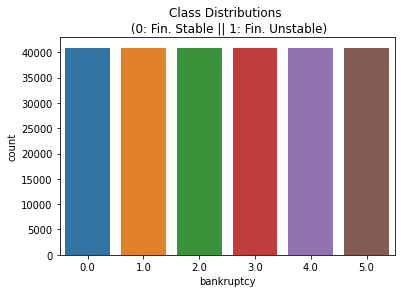

In [36]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Mdf, My = smote.fit_resample(Mx, My)

sns.countplot(x=My['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

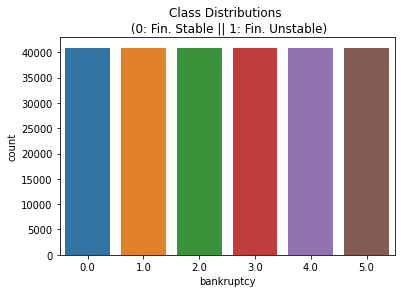

In [37]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Kdf, Ky = smote.fit_resample(Kx, Ky)

sns.countplot(x=Ky['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

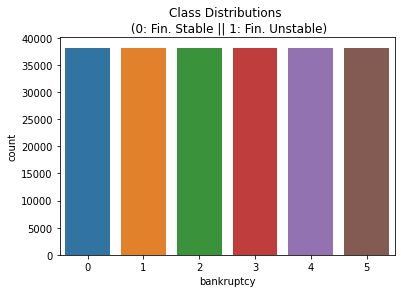

In [38]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Sdf, Sy = smote.fit_resample(Sx, Sy)

sns.countplot(x=Sy['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

# Train, Test 셋 나누기

In [39]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Mx_train, Mx_test, My_train, My_test = train_test_split(Mdf, My,test_size=0.3,random_state=2022)

In [40]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Kx_train, Kx_test, Ky_train, Ky_test = train_test_split(Kdf, Ky,test_size=0.3,random_state=2022)

In [41]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Sx_train, Sx_test, Sy_train, Sy_test = train_test_split(Sdf, Sy,test_size=0.3,random_state=2022)

# 모델 구축 ( 모델 이름 )

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
Mgb_clf = GradientBoostingClassifier(random_state=0)
Mgb_clf.fit(Mx_train, My_train.values)

GradientBoostingClassifier(random_state=0)

In [44]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
Kgb_clf = GradientBoostingClassifier(random_state=0)
Kgb_clf.fit(Kx_train, Ky_train.values)

GradientBoostingClassifier(random_state=0)

In [45]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
Sgb_clf = GradientBoostingClassifier(random_state=0)
Sgb_clf.fit(Sx_train, Sy_train.values)

GradientBoostingClassifier(random_state=0)

# 모델 예측

In [46]:
My_pred = Mgb_clf.predict(Mx_test)
Mgb_accuracy = accuracy_score(My_test, My_pred)

print('GBM 정확도: {:.4f}'.format(Mgb_accuracy))

GBM 정확도: 0.9413


In [47]:
Ky_pred = Kgb_clf.predict(Kx_test)
Kgb_accuracy = accuracy_score(Ky_test, Ky_pred)

print('GBM 정확도: {:.4f}'.format(Kgb_accuracy))

GBM 정확도: 0.9145


In [48]:
Sy_pred = Sgb_clf.predict(Sx_test)
Sgb_accuracy = accuracy_score(Sy_test, Sy_pred)

print('GBM 정확도: {:.4f}'.format(Sgb_accuracy))

GBM 정확도: 0.9166


# 예측 정확도 확인

In [56]:
print("훈련 세트 정확도: {:.3f}".format(Mgb_clf.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mgb_clf.score(Mx_test, My_test)))

훈련 세트 정확도: 0.944
테스트 세트 정확도: 0.941


In [57]:
print("훈련 세트 정확도: {:.3f}".format(Kgb_clf.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Kgb_clf.score(Kx_test, Ky_test)))

훈련 세트 정확도: 0.919
테스트 세트 정확도: 0.915


In [58]:
print("훈련 세트 정확도: {:.3f}".format(Sgb_clf.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Sgb_clf.score(Sx_test, Sy_test)))

훈련 세트 정확도: 0.921
테스트 세트 정확도: 0.917


# 성능 지표 확인 ( + Confusion Matrix )

In [52]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(MX_train, My_train), '\n')
#print("Test_Accuracy : ", model.score(MX_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.94 

F1_score:  0.94 

Confusion Matrix: 
 [[ 8432   298  1280  1139   855   425]
 [   33 12245     0     0     0     0]
 [   85     0 12249     0     0     0]
 [  116     0     0 12161     0     0]
 [   75     0     0     0 11933     0]
 [   16     0     0     0     0 12298]]


In [53]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(KX_train, Ky_train), '\n')
#print("Test_Accuracy : ", model.score(KX_test, Ky_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky_test, Ky_pred)
recall = mt.recall_score(Ky_test, Ky_pred,average='micro')
precision = mt.precision_score(Ky_test, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky_test, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky_test, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.91 

Recall:  0.91 

Precision:  0.91 

F1_score:  0.91 

Confusion Matrix: 
 [[ 6422  1026  1473  1426  1382   700]
 [   19 12259     0     0     0     0]
 [   83     0 12251     0     0     0]
 [  121     0     0 12156     0     0]
 [   47     0     0     0 11961     0]
 [   19     0     0     0     0 12295]]


In [54]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(SX_train, Sy_train), '\n')
#print("Test_Accuracy : ", model.score(SX_test, Sy_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy_test, Sy_pred)
recall = mt.recall_score(Sy_test, Sy_pred,average='micro')
precision = mt.precision_score(Sy_test, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy_test, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy_test, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.92 

Recall:  0.92 

Precision:  0.92 

F1_score:  0.92 

Confusion Matrix: 
 [[ 6054  1000  1315  1324  1213   655]
 [   14 11415     0     0     0     0]
 [   55     0 11488     0     0     0]
 [   77     0     0 11312     0     0]
 [   43     0     0     0 11396     0]
 [   35     0     0     0     0 11298]]
